In [1]:
#Don't forget to save your work to your local computer and push to GitHub.
#File -> Download as -> Notebook
#Move file from download folder to local repo clone
#git add filename.ipynb
#git commit -m "put a specific and informative message here of what you worked on"
#git push

# Importing the Data From All of Us

## Importing the Birth data

Note that data from *All of Us* is being imported into *Final_Birth_Concept_Set_for_Import* and cleaned there,
so the import takes some time (about 2 mins)

In [2]:
# As needed (i.e. once)
!pip install import-ipynb


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


importing Jupyter notebook from Final_Birth_Concept_Set_for_Import.ipynb


Downloading:   0%|          | 0/390805 [00:00<?, ?rows/s]

<bound method DataFrame.info of         person_id       standard_concept_name  condition_start_datetime
0         1820343  Gestation period, 27 weeks 2019-06-20 09:16:54+00:00
1         5244226  Gestation period, 27 weeks 2019-06-28 21:49:06+00:00
2         1843685  Gestation period, 27 weeks 2018-12-10 16:24:59+00:00
3         1998937  Gestation period, 27 weeks 2018-09-11 04:32:38+00:00
4         1269840  Gestation period, 27 weeks 2019-10-02 11:28:43+00:00
...           ...                         ...                       ...
390800    6063783   Third trimester pregnancy 2021-09-22 13:00:00+00:00
390801    2131449   Third trimester pregnancy 2021-02-08 08:47:00+00:00
390802    6148101   Gestation period, 8 weeks 2020-08-31 09:33:00+00:00
390803    1423367   Third trimester pregnancy 2022-03-18 10:04:00+00:00
390804    1851013   Gestation period, 8 weeks 2017-06-08 08:38:00+00:00

[390805 rows x 3 columns]>


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


<bound method DataFrame.info of         person_id       standard_concept_name  condition_start_datetime  \
0         1820343  Gestation period, 27 weeks 2019-06-20 09:16:54+00:00   
1         5244226  Gestation period, 27 weeks 2019-06-28 21:49:06+00:00   
2         1843685  Gestation period, 27 weeks 2018-12-10 16:24:59+00:00   
3         1998937  Gestation period, 27 weeks 2018-09-11 04:32:38+00:00   
4         1269840  Gestation period, 27 weeks 2019-10-02 11:28:43+00:00   
...           ...                         ...                       ...   
173722    1252724           Single live birth 2021-04-16 05:00:00+00:00   
173723    5438954           Single live birth 2007-10-19 05:00:00+00:00   
173724    1423708           Single live birth 2017-02-25 05:00:00+00:00   
173725    3337755           Single live birth 2018-12-29 12:09:00+00:00   
173726    3374987           Single live birth 2010-11-24 05:00:00+00:00   

       condition_start_date  
0                2019-06-20  
1      

Final_Birth_Concept_Set_for_Import.ipynb:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "execution_count": 1,


Entries removed: 5711
Entries kept: 15601
Statistics for Term:
          person_id  gestational_age_at_birth   birth_order
count  1.343400e+04              13434.000000  13434.000000
mean   2.958510e+06                 38.841638      1.276165
std    2.116125e+06                  1.067879      0.530288
min    1.000131e+06                 37.000000      1.000000
25%    1.565325e+06                 38.000000      1.000000
50%    2.200748e+06                 39.000000      1.000000
75%    3.260879e+06                 40.000000      1.000000
max    9.998770e+06                 44.000000      5.000000

Statistics for Preterm:
          person_id  gestational_age_at_birth  birth_order
count  2.167000e+03               2167.000000  2167.000000
mean   2.857171e+06                 33.389149     1.228426
std    2.002075e+06                  3.381602     0.488997
min    1.001034e+06                 22.000000     1.000000
25%    1.559583e+06                 32.000000     1.000000
50%    2.174813e+0

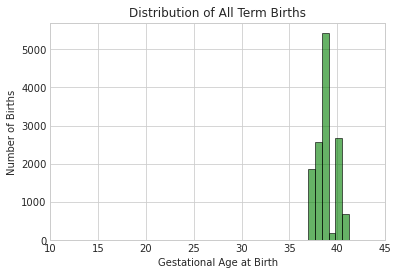

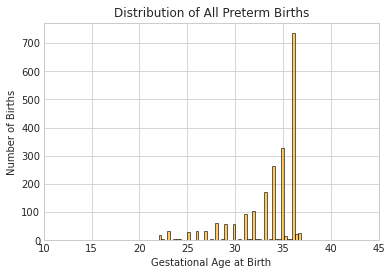

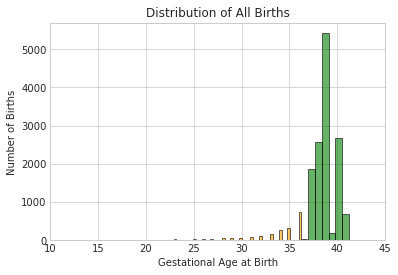

In [3]:
import import_ipynb
from Final_Birth_Concept_Set_for_Import import *

## Importing the *Person* data

In [4]:
import pandas
import os

# This query represents dataset "AS_KG_Dataset" for domain "person" and was generated for All of Us Controlled Tier Dataset v7
dataset_30352193_person_sql = """
    SELECT
        person.person_id,
        person.gender_concept_id,
        p_gender_concept.concept_name as gender,
        person.birth_datetime as date_of_birth,
        person.race_concept_id,
        p_race_concept.concept_name as race,
        person.ethnicity_concept_id,
        p_ethnicity_concept.concept_name as ethnicity,
        person.sex_at_birth_concept_id,
        p_sex_at_birth_concept.concept_name as sex_at_birth 
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.person` person 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_gender_concept 
            ON person.gender_concept_id = p_gender_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_race_concept 
            ON person.race_concept_id = p_race_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_ethnicity_concept 
            ON person.ethnicity_concept_id = p_ethnicity_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_sex_at_birth_concept 
            ON person.sex_at_birth_concept_id = p_sex_at_birth_concept.concept_id  
    WHERE
        person.PERSON_ID IN (
            SELECT
                distinct person_id  
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
            WHERE
                cb_search_person.person_id IN (
                    SELECT
                        criteria.person_id 
                    FROM
                        (SELECT
                            DISTINCT person_id,
                            entry_date,
                            concept_id 
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                        WHERE
                            (
                                concept_id IN (
                                    SELECT
                                        DISTINCT c.concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                    JOIN
                                        (
                                            select
                                                cast(cr.id as string) as id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                            WHERE
                                                concept_id IN (36712702, 45757176, 4014295) 
                                                AND full_text LIKE '%_rank1]%'
                                        ) a 
                                            ON (
                                                c.path LIKE CONCAT('%.',
                                            a.id,
                                            '.%') 
                                            OR c.path LIKE CONCAT('%.',
                                            a.id) 
                                            OR c.path LIKE CONCAT(a.id,
                                            '.%') 
                                            OR c.path = a.id) 
                                        WHERE
                                            is_standard = 1 
                                            AND is_selectable = 1
                                        ) 
                                        AND is_standard = 1 
                                )
                            ) criteria 
                        ) )  
                    AND (person.PERSON_ID IN (SELECT
                        DISTINCT person_id  
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` 
                    WHERE
                        has_ehr_data = 1))"""

dataset_30352193_person_df = pandas.read_gbq(
    dataset_30352193_person_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

#dataset_30352193_person_df.head(5)

Downloading:   0%|          | 0/17524 [00:00<?, ?rows/s]

## Importing the *Zip Code* data

In [5]:
import pandas
import os

# This query represents dataset "AS_KG_Dataset" for domain "zip_code_socioeconomic" and was generated for All of Us Controlled Tier Dataset v7
dataset_30352193_zip_code_socioeconomic_sql = """
    SELECT
        observation.person_id,
        observation.observation_datetime,
        zip_code.zip3_as_string as zip_code,
        zip_code.fraction_assisted_income as assisted_income,
        zip_code.fraction_high_school_edu as high_school_education,
        zip_code.median_income,
        zip_code.fraction_no_health_ins as no_health_insurance,
        zip_code.fraction_poverty as poverty,
        zip_code.fraction_vacant_housing as vacant_housing,
        zip_code.deprivation_index,
        zip_code.acs as american_community_survey_year 
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.zip3_ses_map` zip_code 
    JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.observation` observation 
            ON CAST(SUBSTR(observation.value_as_string,
        0,
        STRPOS(observation.value_as_string,
        '*') - 1) AS INT64) = zip_code.zip3  
    WHERE
        observation.PERSON_ID IN (
            SELECT
                distinct person_id  
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
            WHERE
                cb_search_person.person_id IN (
                    SELECT
                        criteria.person_id 
                    FROM
                        (SELECT
                            DISTINCT person_id,
                            entry_date,
                            concept_id 
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                        WHERE
                            (
                                concept_id IN (
                                    SELECT
                                        DISTINCT c.concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                    JOIN
                                        (
                                            select
                                                cast(cr.id as string) as id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                            WHERE
                                                concept_id IN (36712702, 45757176, 4014295) 
                                                AND full_text LIKE '%_rank1]%'
                                        ) a 
                                            ON (
                                                c.path LIKE CONCAT('%.',
                                            a.id,
                                            '.%') 
                                            OR c.path LIKE CONCAT('%.',
                                            a.id) 
                                            OR c.path LIKE CONCAT(a.id,
                                            '.%') 
                                            OR c.path = a.id) 
                                        WHERE
                                            is_standard = 1 
                                            AND is_selectable = 1
                                        ) 
                                        AND is_standard = 1 
                                )
                            ) criteria 
                        ) ) 
                    AND observation_source_concept_id = 1585250 
                    AND observation.value_as_string NOT LIKE 'Res%'"""

dataset_30352193_zip_code_socioeconomic_df = pandas.read_gbq(
    dataset_30352193_zip_code_socioeconomic_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

#dataset_30352193_zip_code_socioeconomic_df.head(5)

Downloading:   0%|          | 0/17517 [00:00<?, ?rows/s]

## Importing the *BMI* data

In [6]:
import pandas
import os

# This query represents dataset "BMI Dataset" for domain "measurement" and was generated for All of Us Controlled Tier Dataset v7
dataset_92747408_measurement_sql = """
    SELECT
        measurement.person_id,
        m_standard_concept.concept_name as standard_concept_name,
        measurement.measurement_datetime,
        measurement.value_as_number 
    FROM
        ( SELECT
            * 
        FROM
            `""" + os.environ["WORKSPACE_CDR"] + """.measurement` measurement 
        WHERE
            (
                measurement_source_concept_id IN  (
                    SELECT
                        DISTINCT c.concept_id 
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                    JOIN
                        (
                            select
                                cast(cr.id as string) as id 
                            FROM
                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                            WHERE
                                concept_id IN (
                                    903124
                                ) 
                                AND full_text LIKE '%_rank1]%'
                        ) a 
                            ON (
                                c.path LIKE CONCAT('%.',
                            a.id,
                            '.%') 
                            OR c.path LIKE CONCAT('%.',
                            a.id) 
                            OR c.path LIKE CONCAT(a.id,
                            '.%') 
                            OR c.path = a.id) 
                        WHERE
                            is_standard = 0 
                            AND is_selectable = 1
                        )
                )  
                AND (
                    measurement.PERSON_ID IN (
                        SELECT
                            distinct person_id  
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
                        WHERE
                            cb_search_person.person_id IN (
                                SELECT
                                    criteria.person_id 
                                FROM
                                    (SELECT
                                        DISTINCT person_id,
                                        entry_date,
                                        concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                    WHERE
                                        (
                                            concept_id IN (
                                                SELECT
                                                    DISTINCT c.concept_id 
                                                FROM
                                                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                                JOIN
                                                    (
                                                        select
                                                            cast(cr.id as string) as id 
                                                        FROM
                                                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                                        WHERE
                                                            concept_id IN (36712702, 45757176, 4014295) 
                                                            AND full_text LIKE '%_rank1]%'
                                                    ) a 
                                                        ON (
                                                            c.path LIKE CONCAT('%.',
                                                        a.id,
                                                        '.%') 
                                                        OR c.path LIKE CONCAT('%.',
                                                        a.id) 
                                                        OR c.path LIKE CONCAT(a.id,
                                                        '.%') 
                                                        OR c.path = a.id) 
                                                    WHERE
                                                        is_standard = 1 
                                                        AND is_selectable = 1
                                                    ) 
                                                    AND is_standard = 1 
                                            )
                                        ) criteria 
                                    ) 
                                    AND cb_search_person.person_id IN (
                                        SELECT
                                            criteria.person_id 
                                        FROM
                                            (SELECT
                                                DISTINCT person_id,
                                                entry_date,
                                                concept_id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                            WHERE
                                                (
                                                    concept_id IN (903124) 
                                                    AND is_standard = 0 
                                                )) criteria ) 
                                    )
                                )) measurement 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_standard_concept 
                                ON measurement.measurement_concept_id = m_standard_concept.concept_id"""

dataset_92747408_measurement_df = pandas.read_gbq(
    dataset_92747408_measurement_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

# dataset_92747408_measurement_df.head(5)

Downloading:   0%|          | 0/16016 [00:00<?, ?rows/s]

# Combining each data frame into a single data frame

## Importing needed packages

In [7]:
import pandas as pd

## Renaming individual data frames and dropping columns we don't need

In [8]:
# condition_df

condition_df = final_birth_data


# person_df

person_df_drop_columns = ['gender_concept_id', 'race_concept_id', 'ethnicity_concept_id', 'sex_at_birth_concept_id']

person_df = dataset_30352193_person_df.drop(columns=person_df_drop_columns)


# zip_df

# note this wikipedia list of zip_code prefixes (i.e. first 3 digits):
# https://en.wikipedia.org/wiki/List_of_ZIP_Code_prefixes

zip_df = dataset_30352193_zip_code_socioeconomic_df


# bmi_df

bmi_df_drop_columns = ['standard_concept_name', 'measurement_datetime']

bmi_df = dataset_92747408_measurement_df.drop(columns=bmi_df_drop_columns)

## Finding common values of *person_id* and restricting data frames to rows with common values

In [9]:
# create a dictionary of values of person_id and multiplicities in each data frame

## start by creating sets of unique ids

unique_ids_condition = list(condition_df.person_id.unique())
unique_ids_person = list(person_df.person_id.unique())
unique_ids_zip = list(zip_df.person_id.unique())
unique_ids_bmi = list(bmi_df.person_id.unique())

In [10]:
## create a set of values of person_id that occur in each data frame
## we then sort common_ids in ascending order

## since we only have four data frames, easy to construct full hierarchy, if we want

common_ids = []

for pid in unique_ids_condition:
    if (pid in unique_ids_person) and (pid in unique_ids_zip) and (pid in unique_ids_bmi):
        common_ids.append(pid)

common_ids.sort()

In [11]:
## restrict data frames to rows with personal_id values in common_ids
## Also, we sort by person_id

## For restricted condition, we primarily sort by person_id, but
## for each value of person_id, we then sort by birth order

restricted_condition = condition_df[condition_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id", "birth_order"])
restricted_person = person_df[person_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id"])
restricted_zip = zip_df[zip_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id"])
restricted_bmi = bmi_df[bmi_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id"])

## Merging restricted_person, restricted_zip, and restricted_bmi

In [12]:
## restricted_condition, restricted_person, and restricted_zip all have the same values of person_id occuring in them
## each value of person_id occurs only once in restricted_person and restricted_zip
## we start by simply merging restricted_person and restricted_zip along person_id

combined_df_half = pd.merge(restricted_person, restricted_zip, on='person_id')

## next, we rename the columns to identify which data frame they originally came from

person_zip_col_dict = {}

for col in restricted_person.columns:
    if col != 'person_id':
        person_zip_col_dict[col] = col+"_person"

for col in restricted_zip.columns:
    if col != 'person_id':
        person_zip_col_dict[col] = col+"_zip"

combined_df_half = combined_df_half.rename(columns=person_zip_col_dict)

In [13]:
# check to see if restricted_bmi has multiple instances of any value of person_id

#bmi_dict = {}

#for pid in common_ids:
#    if pid in bmi_dict.keys():
#        bmi_dict[pid] += 1
#    else:
#        bmi_dict[pid] = 1

#bmi_max = max(bmi_dict.values())

#print(bmi_max)

# As of 14 Nov 2023, restricted_bmi has exactly one instance of every value of person_id in common_ids
combined_df_half = pd.merge(combined_df_half, restricted_bmi, on='person_id')
combined_df_half = combined_df_half.rename(columns={'value_as_number': 'BMI'})

## Adding the *condition* data

### We start by splitting up *restricted_condition* by *birth_order*

In [14]:
## Note that as of 11 Nov 2023, we see
## Everyone has a first birth
## 3127 out of 11952 have a second birth
## 467 out of 11952 have a third birth
## For run time concerns, we only include first and second births

first_birth = restricted_condition[restricted_condition['birth_order'] == 1].copy().sort_values(by=["person_id"])
second_birth = restricted_condition[restricted_condition['birth_order'] == 2].copy().sort_values(by=["person_id"])
#third_birth = restricted_condition[restricted_condition['birth_order'] == 3].copy().sort_values(by=["person_id"])
#fourth_birth = restricted_condition[restricted_condition['birth_order'] == 4].copy().sort_values(by=["person_id"])
#fifth_birth = restricted_condition[restricted_condition['birth_order'] == 5].copy().sort_values(by=["person_id"])

### Next, we fill out *second_birth* so there is a row for every value of *person_id*

In [15]:
# ## We now reset the indexing on second_birth to easily add our extra rows

# second_birth.reset_index(drop=True, inplace=True)

# last_index = second_birth.index.max()

# true_second_birthers = second_birth.person_id.tolist()

# for pid in common_ids:
#     if pid not in true_second_birthers:
#         last_index += 1
#         second_birth.loc[last_index] = [pid, None, None, None, 2]

# second_birth = second_birth.sort_values(by=["person_id"])

### We update the column names in *first_birth* and *second_birth* before merging and drop *birth_order*

In [16]:
# first_birth_dict = {}

# for col in first_birth.columns:
#     if col != 'person_id':
#         first_birth_dict[col] = "first_"+col
        
# second_birth_dict = {}

# for col in second_birth.columns:
#     if col != 'person_id':
#         second_birth_dict[col] = "second_"+col

# first_birth = first_birth.rename(columns=first_birth_dict)
# second_birth = second_birth.rename(columns=second_birth_dict)

# first_birth = first_birth.drop(columns=['first_birth_order'])
# second_birth = second_birth.drop(columns=['second_birth_order'])

### Finally, we merge *first_birth* and *second_birth* with *combined_df* along *person_id*

In [17]:
combined_df_first_births = pd.merge(combined_df_half, first_birth, on='person_id')

# first, restrict our copy of combined_df_half to values of person_id present in second_birth

combined_df_second_births = combined_df_half.copy()


second_birthers = second_birth.person_id.tolist()


combined_df_second_births = combined_df_second_births[combined_df_second_births['person_id'].isin(second_birthers)].copy()
combined_df_second_births = combined_df_second_births.sort_values(by=["person_id"])


combined_df_second_births = pd.merge(combined_df_second_births, second_birth, on='person_id')

In [18]:
combined_df = pd.concat([combined_df_first_births, combined_df_second_births])

combined_df = combined_df.sort_values(by=["person_id", "birth_order"])

combined_df.reset_index(inplace=True)

combined_df.drop(columns=['index'])

,person_id,gender_person,date_of_birth_person,race_person,ethnicity_person,sex_at_birth_person,observation_datetime_zip,zip_code_zip,assisted_income_zip,high_school_education_zip,...,no_health_insurance_zip,poverty_zip,vacant_housing_zip,deprivation_index_zip,american_community_survey_year_zip,BMI,condition_start_date,birth_class,gestational_age_at_birth,birth_order
0,1000131,"Not man only, not woman only, prefer not to an...",2002-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,2021-09-09 17:18:12+00:00,853**,13.019775,85.134547,...,10.762228,13.981854,12.360850,0.331276,2017,36.500000,2021-09-22,Term,39.0,1
1,1000195,Female,1982-06-15 00:00:00+00:00,Black or African American,Not Hispanic or Latino,Female,2019-04-15 19:33:14+00:00,104**,38.279736,70.896923,...,11.049983,29.653439,5.505385,0.485979,2017,28.299999,2021-08-10,Term,40.0,1
2,1000724,Female,1999-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,2017-09-19 13:40:32+00:00,154**,20.910346,88.333925,...,6.287592,18.639903,15.527784,0.360499,2017,40.599998,2019-08-06,Term,40.0,1
3,1001000,Female,1999-06-15 00:00:00+00:00,Black or African American,Hispanic or Latino,Female,2020-02-13 18:47:27+00:00,927**,15.587510,66.084673,...,16.807387,16.542301,2.669649,0.397667,2017,28.700001,2018-11-09,Term,40.0,1
4,1001034,Female,1989-06-15 00:00:00+00:00,None of these,What Race Ethnicity: Race Ethnicity None Of These,Female,2019-05-17 18:48:39+00:00,850**,18.509215,78.387333,...,17.148201,22.064159,10.368943,0.409916,2017,28.900000,2017-06-28,Term,39.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13279,9977453,Female,1982-06-15 00:00:00+00:00,None Indicated,Hispanic or Latino,Female,2021-12-22 20:03:22+00:00,104**,38.279736,70.896923,...,11.049983,29.653439,5.505385,0.485979,2017,33.500000,2022-05-05,Term,39.0,1
13280,9981792,Female,1976-06-15 00:00:00+00:00,None Indicated,Hispanic or Latino,Female,2022-04-11 21:45:02+00:00,100**,17.355981,85.665558,...,6.863952,17.753432,11.598508,0.314289,2017,22.799999,2018-01-08,Term,39.0,1
13281,9982785,Female,1992-06-15 00:00:00+00:00,Black or African American,Not Hispanic or Latino,Female,2021-06-17 17:50:48+00:00,853**,13.019775,85.134547,...,10.762228,13.981854,12.360850,0.331276,2017,27.799999,2021-06-30,Term,39.0,1
13282,9989602,Female,1991-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,2021-03-02 17:37:55+00:00,853**,13.019775,85.134547,...,10.762228,13.981854,12.360850,0.331276,2017,29.799999,2017-01-14,Term,37.0,1


In [19]:
birth = combined_df.copy().drop(columns=['index'])

birth['birth_class_binary'] = 1

birth.loc[birth.birth_class=='Preterm', 'birth_class_binary'] = 0

In [32]:
pd.options.display.max_columns = None
birth.head(8)

(13284, 23)

### Adding mother's ages: *age_first_birth* and *age_second_birth*

In [27]:
if birth['date_of_birth_person'].dt.tz is not None:
    print("Timezone information is present.")
    print("Timezone:", birth['date_of_birth_person'].dt.tz)
else:
    print("Timezone information is not present.")

Timezone information is present.
Timezone: UTC


In [29]:
from datetime import datetime
import pytz

# # Mother's age at first birth: Subtract date_of_birth_person from first_condition_start_date
# age_first = combined_df['first_condition_start_date'].dt.tz_localize('UTC') - combined_df['date_of_birth_person']

# age_first_round = np.round(age_first.astype('timedelta64[D]')/365, 2)
# combined_df.insert(loc = 19,
#                     column = 'age_first_birth',
#                     value = age_first_round)
# combined_df.head()

# # Mother's age at second birth: Subtract date_of_birth_person from first_condition_start_date
# age_second = combined_df['second_condition_start_date'].dt.tz_localize('UTC') - combined_df['date_of_birth_person']

# age_second_round = np.round(age_second.astype('timedelta64[D]')/365, 2)
# combined_df.insert(loc = 23,
#                     column = 'age_second_birth',
#                     value = age_second_round)
# combined_df.head()

# Mother's age at birth: Subtract date_of_birth_person from observation_datetime_zip
age = birth['observation_datetime_zip'].dt.tz_convert('UTC') - birth['date_of_birth_person']

age_round = np.round(age.astype('timedelta64[D]')/365, 2)
birth.insert(loc = 19,
                    column = 'age_birth',
                    value = age_round)
birth.head()

,person_id,gender_person,date_of_birth_person,race_person,ethnicity_person,sex_at_birth_person,observation_datetime_zip,zip_code_zip,assisted_income_zip,high_school_education_zip,median_income_zip,no_health_insurance_zip,poverty_zip,vacant_housing_zip,deprivation_index_zip,american_community_survey_year_zip,BMI,condition_start_date,birth_class,age_birth,gestational_age_at_birth,birth_order,birth_class_binary
0,1000131,"Not man only, not woman only, prefer not to an...",2002-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,2021-09-09 17:18:12+00:00,853**,13.019775,85.134547,61580.823283,10.762228,13.981854,12.360850,0.331276,2017,36.500000,2021-09-22,Term,19.25,39.0,1,1
1,1000195,Female,1982-06-15 00:00:00+00:00,Black or African American,Not Hispanic or Latino,Female,2019-04-15 19:33:14+00:00,104**,38.279736,70.896923,39407.415829,11.049983,29.653439,5.505385,0.485979,2017,28.299999,2021-08-10,Term,36.86,40.0,1,1
2,1000724,Female,1999-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,2017-09-19 13:40:32+00:00,154**,20.910346,88.333925,42632.000716,6.287592,18.639903,15.527784,0.360499,2017,40.599998,2019-08-06,Term,18.28,40.0,1,1
3,1001000,Female,1999-06-15 00:00:00+00:00,Black or African American,Hispanic or Latino,Female,2020-02-13 18:47:27+00:00,927**,15.587510,66.084673,69333.203649,16.807387,16.542301,2.669649,0.397667,2017,28.700001,2018-11-09,Term,20.68,40.0,1,1
4,1001034,Female,1989-06-15 00:00:00+00:00,None of these,What Race Ethnicity: Race Ethnicity None Of These,Female,2019-05-17 18:48:39+00:00,850**,18.509215,78.387333,54223.044605,17.148201,22.064159,10.368943,0.409916,2017,28.900000,2017-06-28,Term,29.94,39.0,1,1


# Data Exploration and Visualizations

## Importing packages for data exploration and visualizations

In [19]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

## Cohort Summaries

<AxesSubplot:>

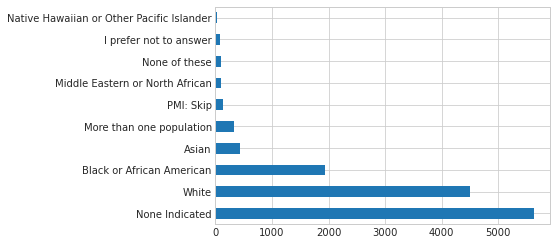

In [34]:
# Bar plot for race

combined_df.race_person.value_counts().plot(kind = 'barh')

<AxesSubplot:>

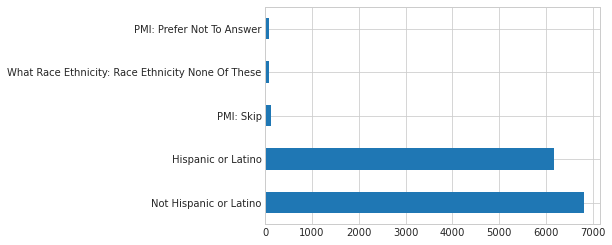

In [35]:
# Bar plot for ethnicity

combined_df.ethnicity_person.value_counts().plot(kind = 'barh')

In [ ]:
# Scatter plot for education & income

plt.figure(figsize=(14,6))

sns.lmplot(data = combined_df,
            x = "high_school_education_zip",
            y = 'median_income_zip',
            hue = 'first_birth_class',
            scatter_kws={'alpha':0.05})

plt.xlabel("HS Education in Zip Code")
plt.ylabel("Median Income in Zip Code")
plt.xticks(rotation=30)
plt.show()

## First Birth

### Pairplot and Distributions — Continuous Data

<Figure size 864x864 with 0 Axes>

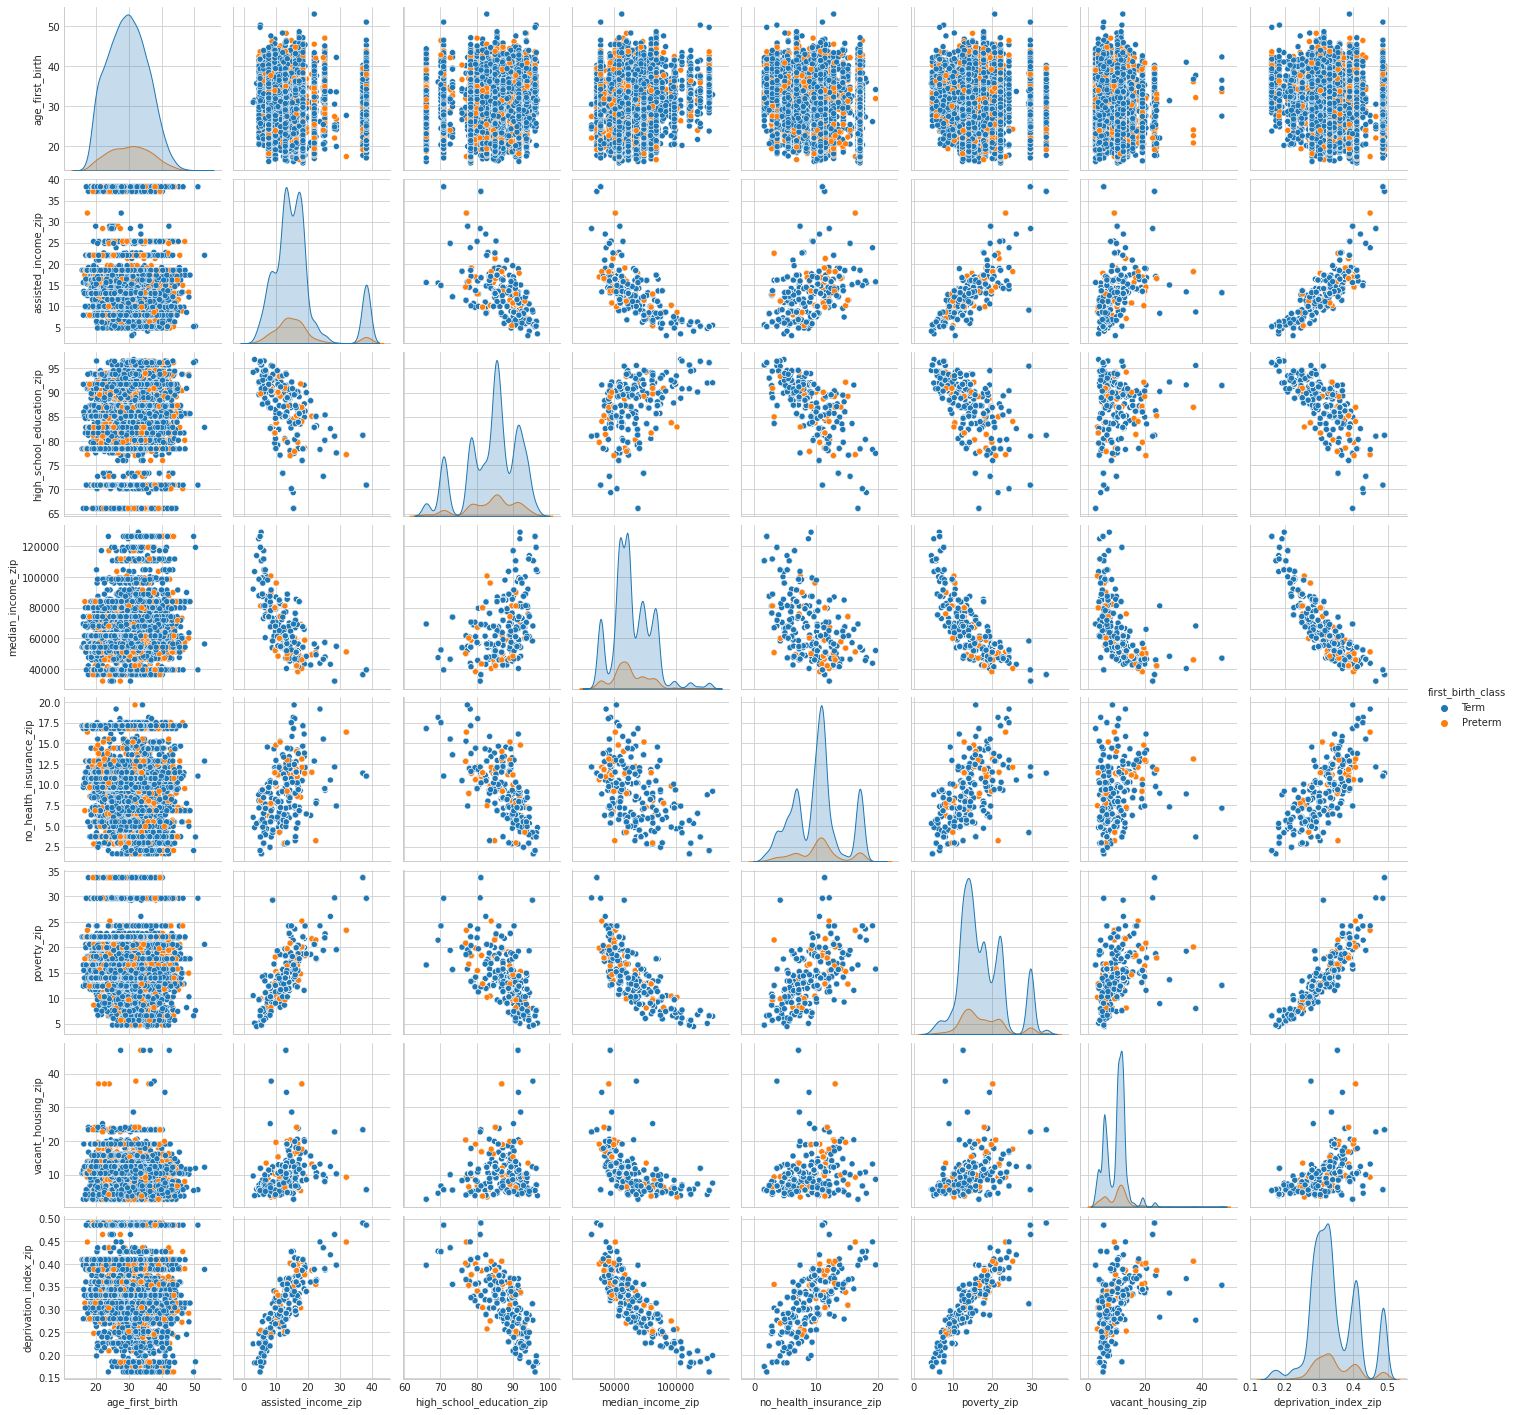

In [21]:
plt.figure(figsize=(12,12))

cols_to_plot = ['first_birth_class', 'age_first_birth', \
                'assisted_income_zip','high_school_education_zip','median_income_zip', \
                'no_health_insurance_zip','poverty_zip','vacant_housing_zip','deprivation_index_zip']

sns.pairplot(combined_df[cols_to_plot], hue='first_birth_class')

plt.show()

### Get Total Counts for Normalization

In [25]:
# Calculate and save value counts

num_first_birth_term = combined_df.first_birth_class.value_counts()[0]
num_first_birth_preterm = combined_df.first_birth_class.value_counts()[1]


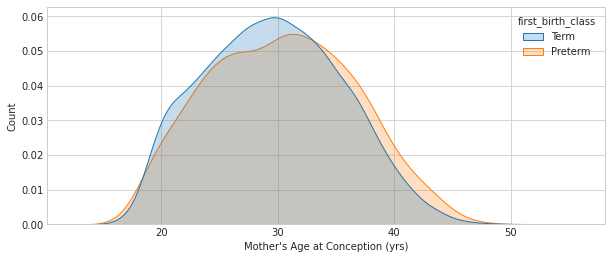

In [28]:
# Histogram of mother's age by birth class
plt.figure(figsize=(10,4))

sns.set_style('whitegrid')
sns.kdeplot(data=combined_df,
            x='age_first_birth', 
            hue='first_birth_class', 
            fill=True,
            common_norm=False)

plt.xlabel("Mother's Age at Conception (yrs)")
plt.ylabel('Count')
plt.show()

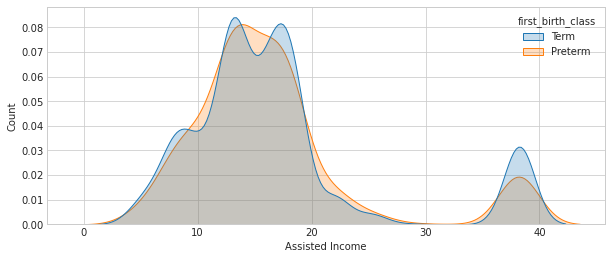

In [47]:
# Histogram of assisted income by birth class
plt.figure(figsize=(10,4))

sns.set_style('whitegrid')
sns.kdeplot(data=combined_df,
            x='assisted_income_zip', 
            hue='first_birth_class', 
            fill=True,
            common_norm=False)

plt.xlabel("Assisted Income")
plt.ylabel('Count')
plt.show()

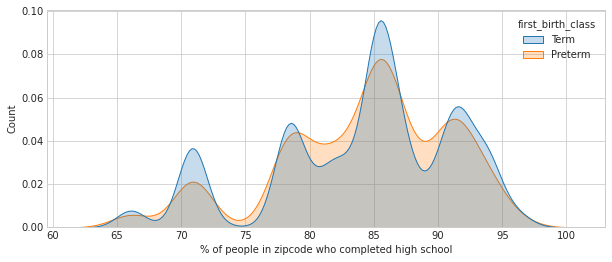

In [29]:
# Histogram of education by birth class
plt.figure(figsize=(10,4))

sns.set_style('whitegrid')
sns.kdeplot(data=combined_df,
            x='high_school_education_zip', 
            hue='first_birth_class', 
            fill=True,
            common_norm=False)

plt.xlabel('% of people in zipcode who completed high school')
plt.ylabel('Count')
plt.show()

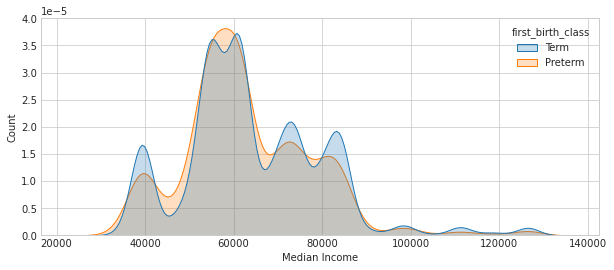

In [48]:
# Histogram of median income by birth class
plt.figure(figsize=(10,4))

sns.set_style('whitegrid')
sns.kdeplot(data=combined_df,
            x='median_income_zip', 
            hue='first_birth_class', 
            fill=True,
            common_norm=False)

plt.xlabel("Median Income")
plt.ylabel('Count')
plt.show()

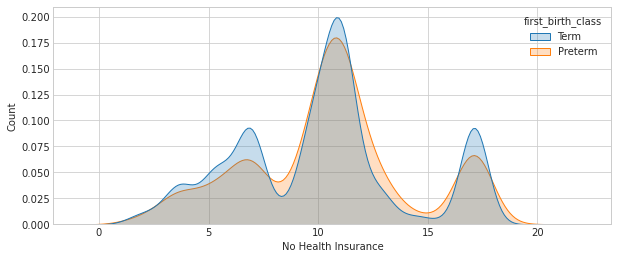

In [49]:
# Histogram of health insurance by birth class
plt.figure(figsize=(10,4))

sns.set_style('whitegrid')
sns.kdeplot(data=combined_df,
            x='no_health_insurance_zip', 
            hue='first_birth_class', 
            fill=True,
            common_norm=False)

plt.xlabel("No Health Insurance")
plt.ylabel('Count')
plt.show()

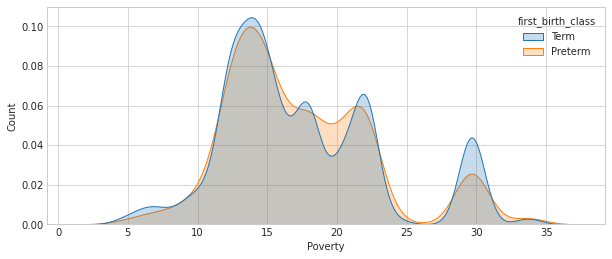

In [50]:
# Poverty by birth class
plt.figure(figsize=(10,4))

sns.set_style('whitegrid')
sns.kdeplot(data=combined_df,
            x='poverty_zip', 
            hue='first_birth_class', 
            fill=True,
            common_norm=False)

plt.xlabel("Poverty")
plt.ylabel('Count')
plt.show()

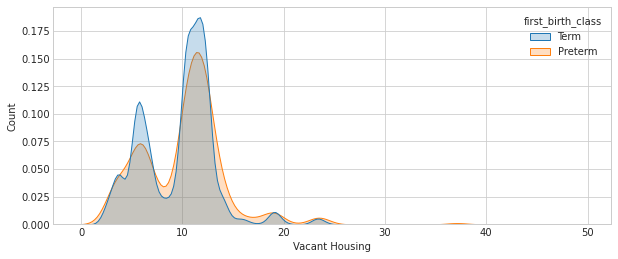

In [51]:
# Vacant housing by birth class
plt.figure(figsize=(10,4))

sns.set_style('whitegrid')
sns.kdeplot(data=combined_df,
            x='vacant_housing_zip', 
            hue='first_birth_class', 
            fill=True,
            common_norm=False)

plt.xlabel("Vacant Housing")
plt.ylabel('Count')
plt.show()

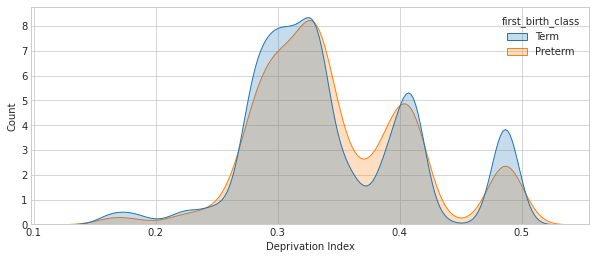

In [30]:
# Histogram of deprivation index by birth class
plt.figure(figsize=(10,4))

sns.set_style('whitegrid')
sns.kdeplot(data=combined_df,
            x='deprivation_index_zip', 
            hue='first_birth_class', 
            fill=True,
            common_norm=False)

plt.xlabel("Deprivation Index")
plt.ylabel('Count')
plt.show()

### Count Plots — Categorical Data

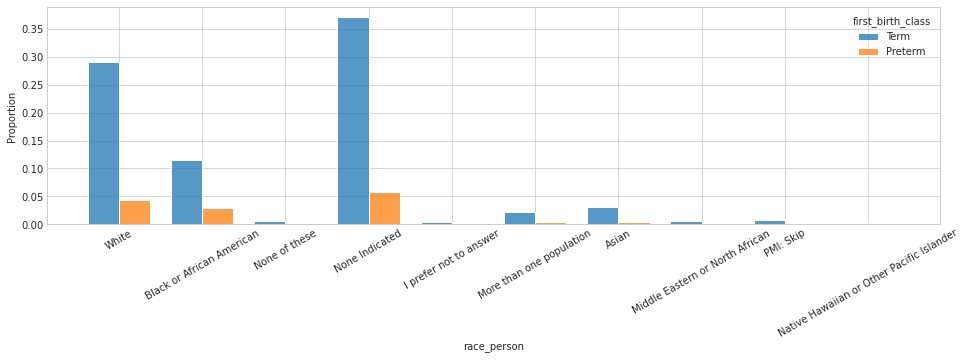

In [44]:
# Race count plot

plt.figure(figsize=(16,4))

sns.histplot(data = combined_df,
            x='race_person',
            hue='first_birth_class',
            multiple='dodge', shrink=0.75,
            stat='proportion')

plt.xticks(rotation=30)

plt.show()

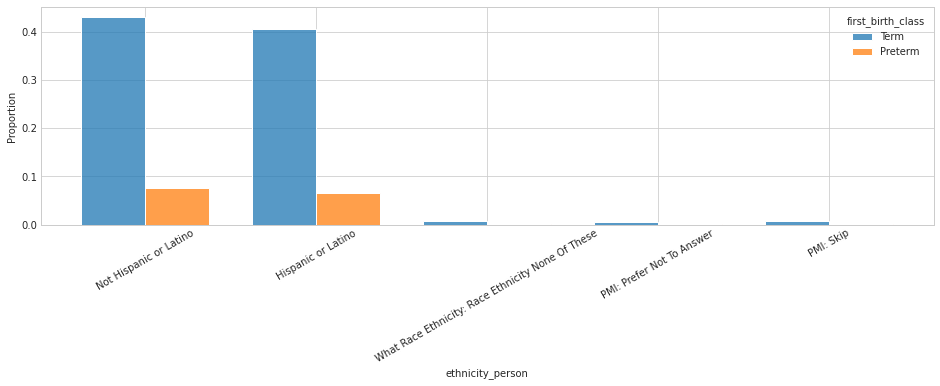

In [46]:
# Ethnicity count plot

plt.figure(figsize=(16,4))

sns.histplot(data = combined_df,
            x='ethnicity_person',
            hue='first_birth_class',
            multiple='dodge', shrink=0.75,
            stat='proportion')

plt.xticks(rotation=30)

plt.show()

### Box Plots — Interaction Data

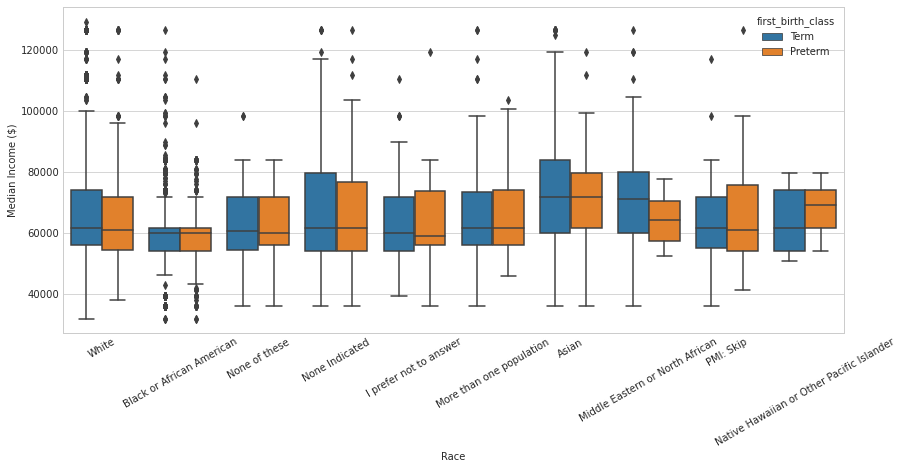

In [55]:
# Box plot for race & median income by birth class

plt.figure(figsize=(14,6))

sns.boxplot(data = combined_df,
             x = 'race_person',
             y = 'median_income_zip',
             hue = 'first_birth_class')

plt.xlabel("Race")
plt.ylabel("Median Income ($)")
plt.xticks(rotation=30)
plt.show()

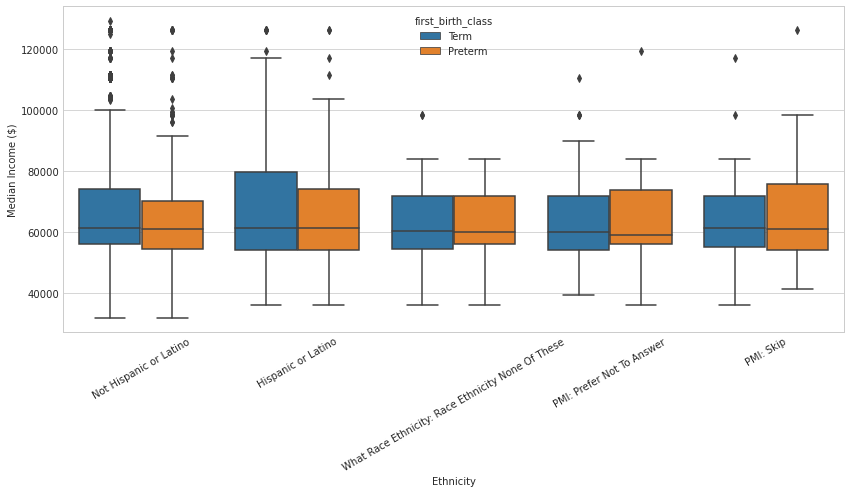

In [56]:
# Box plot for ethnicity & median income by birth class

plt.figure(figsize=(14,6))

sns.boxplot(data = combined_df,
              x = 'ethnicity_person',
              y = 'median_income_zip',
              hue = 'first_birth_class')

plt.xlabel("Ethnicity")
plt.ylabel("Median Income ($)")
plt.xticks(rotation=30)
plt.show()

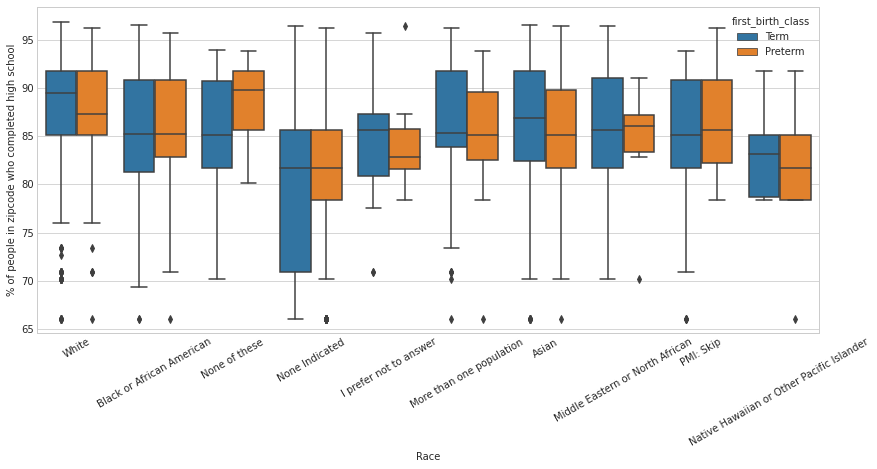

In [30]:
# Box plot for race & education by birth class

plt.figure(figsize=(14,6))

sns.boxplot(data = combined_df,
            x = 'race_person',
            y = 'high_school_education_zip',
            hue = 'first_birth_class')

plt.xlabel("Race")
plt.ylabel("% of people in zipcode who completed high school")
plt.xticks(rotation=30)
plt.show()

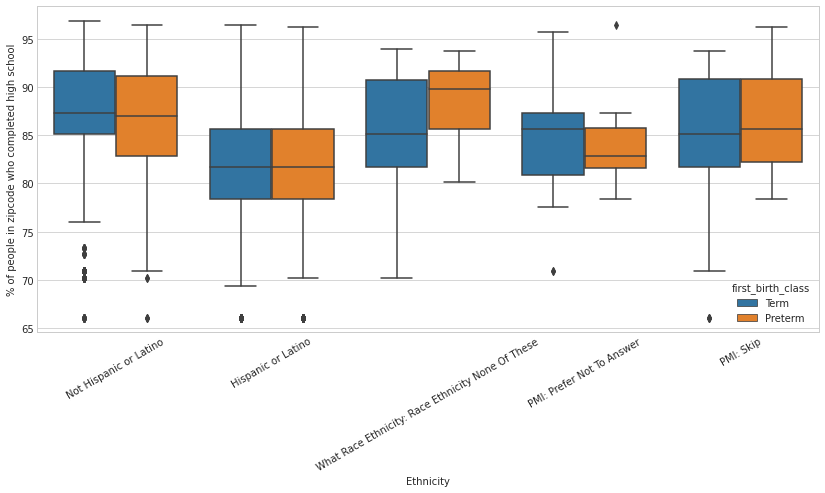

In [62]:
# Box plot for ethnicity & education

plt.figure(figsize=(14,6))

sns.boxplot(data = combined_df,
            x = 'ethnicity_person',
            y = 'high_school_education_zip',
            hue = 'first_birth_class')

plt.xlabel("Ethnicity")
plt.ylabel("% of people in zipcode who completed high school")
plt.xticks(rotation=30)
plt.show()

<Figure size 1008x432 with 0 Axes>

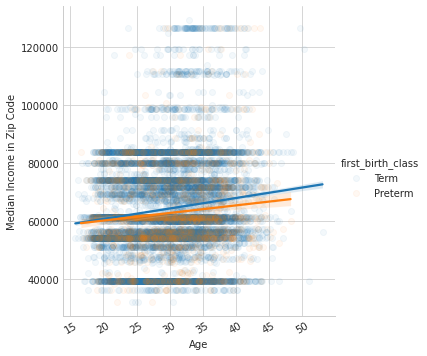

In [74]:
# Scatter plot for income & age

plt.figure(figsize=(14,6))

sns.lmplot(data = combined_df,
            x = "age_first_birth",
            y = 'median_income_zip',
            hue = 'first_birth_class',
            scatter_kws={'alpha':0.05})

plt.xlabel("Age")
plt.ylabel("Median Income in Zip Code")
plt.xticks(rotation=30)
plt.show()

<Figure size 1008x432 with 0 Axes>

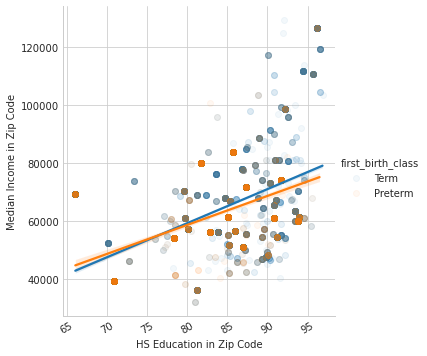

In [79]:
# Scatter plot for education & income

plt.figure(figsize=(14,6))

sns.lmplot(data = combined_df,
            x = "high_school_education_zip",
            y = 'median_income_zip',
            hue = 'first_birth_class',
            scatter_kws={'alpha':0.05})

plt.xlabel("HS Education in Zip Code")
plt.ylabel("Median Income in Zip Code")
plt.xticks(rotation=30)
plt.show()

## Second Birth

<Figure size 864x864 with 0 Axes>

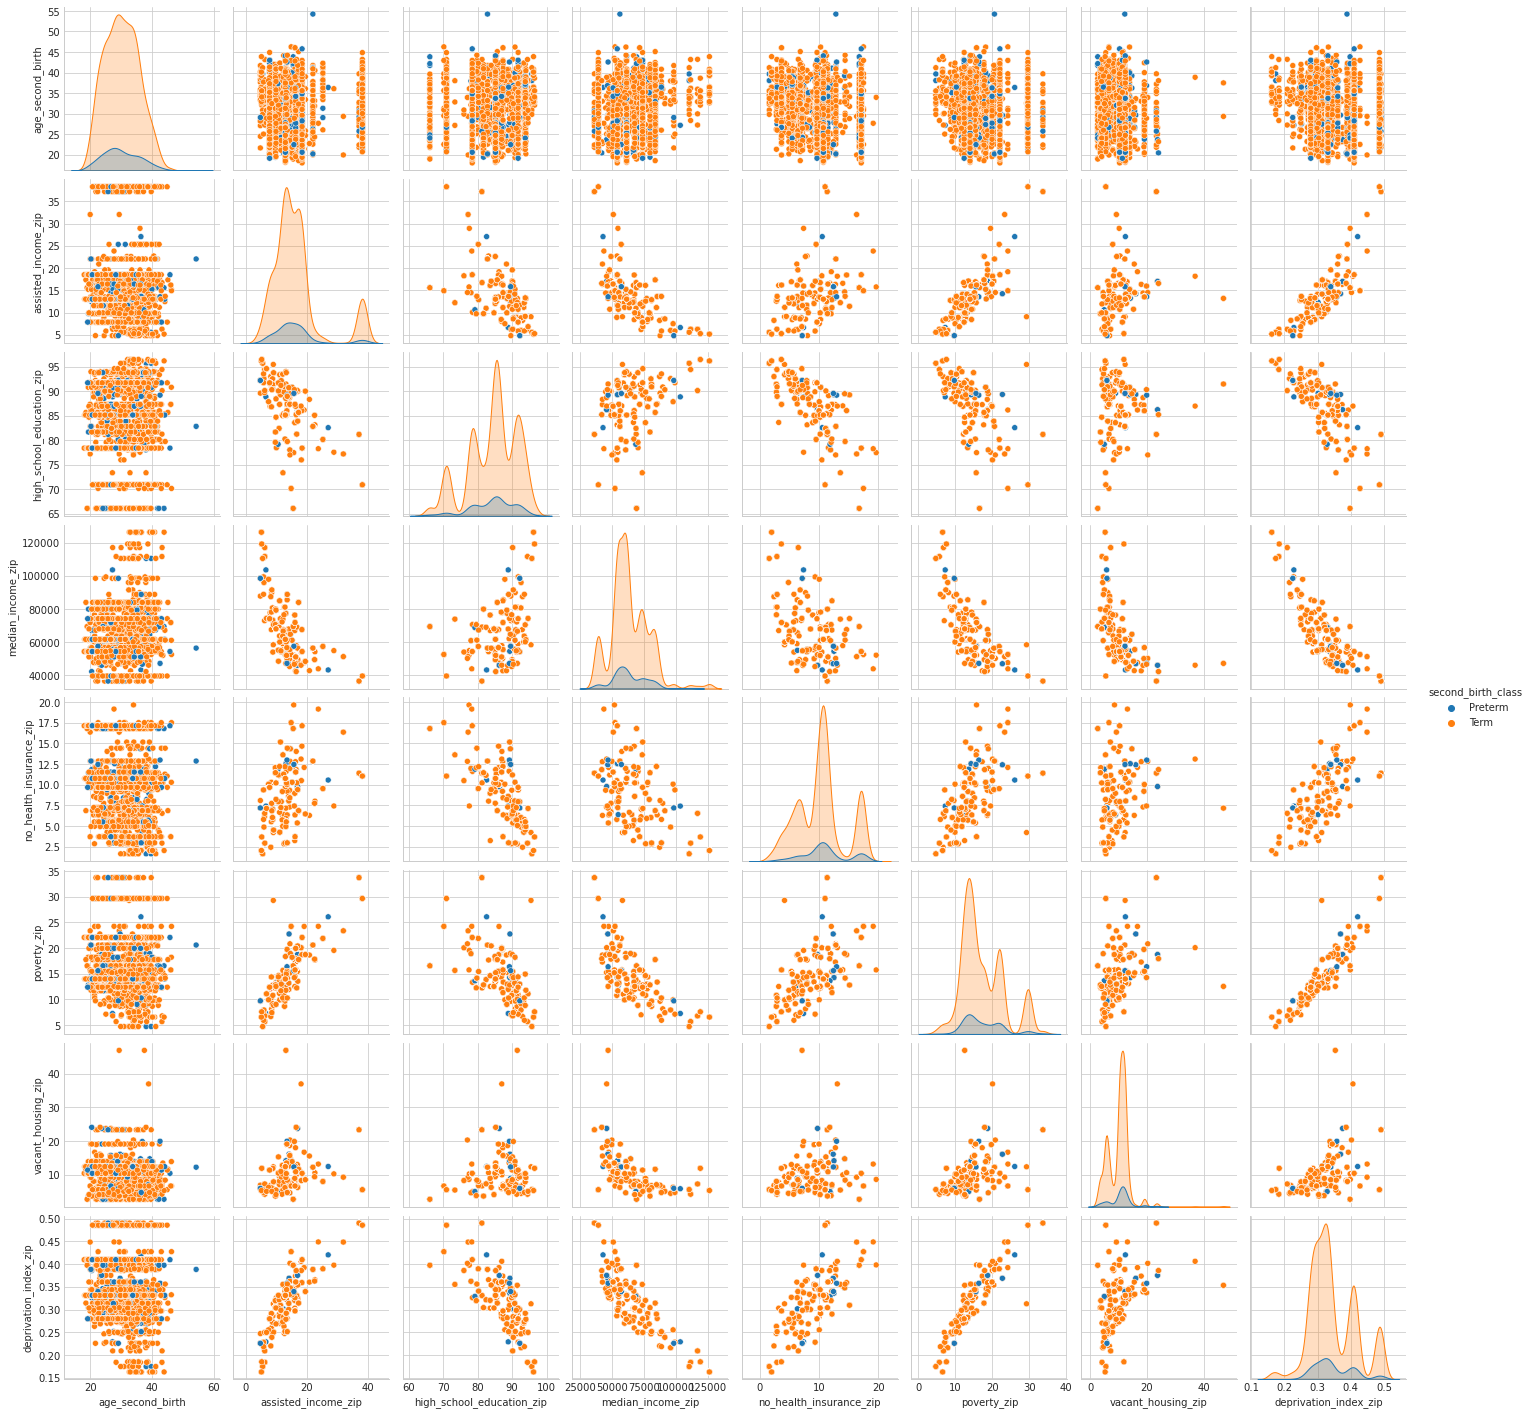

In [80]:
plt.figure(figsize=(12,12))

cols_to_plot = ['second_birth_class', 'age_second_birth', \
                'assisted_income_zip','high_school_education_zip','median_income_zip', \
                'no_health_insurance_zip','poverty_zip','vacant_housing_zip','deprivation_index_zip']

sns.pairplot(combined_df[cols_to_plot], hue='second_birth_class')

plt.show()

In [81]:
combined_df.second_birth_class.value_counts()

Term       2750
Preterm     377
Name: second_birth_class, dtype: int64

# Applying AI Fairness 360 to examine bias in our dataset

Based on the literature, we expect our data to reflect known real-world bias. We want to understand the biases present to inform our model interpretation and gain insight into the fairness of our model. 

In [ ]:
!pip install aif360

In [ ]:
# Prepare dataset
fairness_df = combined_df.copy()

# List of columns to drop
columns_to_drop = ['person_id', 'gender_person', 'sex_at_birth_person', 'observation_datetime_zip', 'second_birth_class']  
columns_to_drop.extend(['first_condition_start_date', 'second_condition_start_date', 'first_gestational_age_at_birth'])  
columns_to_drop.extend(['american_community_survey_year_zip', 'second_gestational_age_at_birth', 'date_of_birth_person']) 
columns_to_drop.extend(['ethnicity_person', 'zip_code_zip']) 

# Drop the specified columns
fairness_df.drop(columns=columns_to_drop, inplace=True)

# Make sure we are binary coded birth_class
fairness_df['first_birth_class'] = fairness_df['first_birth_class'].replace({'Term': 0, 'Preterm': 1})

# One-hot encode protected attribute race_person
fairness_df = pd.get_dummies(fairness_df, columns=['race_person'], prefix = 'race')

# Combine columns
fairness_df['race_None'] = fairness_df['race_None of these'] + fairness_df['race_None Indicated'] + fairness_df['race_PMI: Skip']

# Drop the original 'race_White' and 'race_None' columns
fairness_df = fairness_df.drop(['race_None Indicated', 'race_None', 'race_None of these', 'race_PMI: Skip', 'race_I prefer not to answer'], axis=1)



fairness_df.head()


In [ ]:
import aif360
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.datasets import BinaryLabelDataset

race_categories = ["race_Black or African American", "race_Asian", "race_Middle Eastern or North African", "race_More than one population", "race_Native Hawaiian or Other Pacific Islander"]

for minority_group in race_categories: 

    # Create a BinaryLabelDataset from the subset
    label_column_name = 'first_birth_class'  
    bld = BinaryLabelDataset(
        favorable_label=0, unfavorable_label=1,
        df=fairness_df, label_names=[label_column_name],
        protected_attribute_names=['race_White', minority_group]
    )

    # Specify privileged and unprivileged groups
    privileged_groups = [{'race_White': 1}]
    unprivileged_groups = [{'race_White': 0, minority_group: 1}]


    # Create an instance of BinaryLabelDatasetMetric
    metric_bld = BinaryLabelDatasetMetric(bld, privileged_groups=privileged_groups, unprivileged_groups=unprivileged_groups)

    # Use available metrics
    print("For protected class: ", minority_group)
    print("Disparate Impact:", metric_bld.disparate_impact())
    print("Mean Difference:", metric_bld.mean_difference())


# Great Expecations for data validation
..not working...

In [ ]:
!conda install -c conda-forge g2p-en
!pip install g2p_en
!pip install great_expectations

import great_expectations as gx

In [ ]:
context = gx.get_context()

from great_expectations.dataset import PandasDataset

validator = PandasDataset(combined_df)